In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First load in the drivers, results and races datasets. Let's also remove any unneeded columns:

In [2]:
drivers = pd.read_csv('./data/drivers.csv')
drivers.head()                      

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [3]:
drivers = drivers[['driverId','forename','surname']]
drivers.head(20)

,driverId,forename,surname
0,1,Lewis,Hamilton
1,2,Nick,Heidfeld
2,3,Nico,Rosberg
3,4,Fernando,Alonso
4,5,Heikki,Kovalainen
5,6,Kazuki,Nakajima
6,7,Sébastien,Bourdais
7,8,Kimi,Räikkönen
8,9,Robert,Kubica
9,10,Timo,Glock


In [4]:
results = pd.read_csv('./data/results.csv')
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
results = results[['resultId', 'raceId', 'driverId', 'position', 'positionText']]
results.head()

,resultId,raceId,driverId,position,positionText
0,1,18,1,1,1
1,2,18,2,2,2
2,3,18,3,3,3
3,4,18,4,4,4
4,5,18,5,5,5


In [6]:
results[results.driverId == 1]

,resultId,raceId,driverId,position,positionText
0,1,18,1,1,1
26,27,19,1,5,5
56,57,20,1,13,13
68,69,21,1,3,3
89,90,22,1,2,2
...,...,...,...,...,...
24840,24846,1042,1,1,1
24860,24866,1043,1,1,1
24880,24886,1044,1,1,1
24900,24906,1045,1,1,1


In [7]:
races = pd.read_csv('./data/races.csv')
races = races[['raceId','name','date']]
races.head()

,raceId,name,date
0,1,Australian Grand Prix,2009-03-29
1,2,Malaysian Grand Prix,2009-04-05
2,3,Chinese Grand Prix,2009-04-19
3,4,Bahrain Grand Prix,2009-04-26
4,5,Spanish Grand Prix,2009-05-10


Next we merge these dataframes together. The end results is a data frame of all the race results, with extra information such as the race name, driver name, and that drivers final position in that race.

In [8]:
race_results = races.merge(results, on='raceId')
race_results.head()

,raceId,name,date,resultId,driverId,position,positionText
0,1,Australian Grand Prix,2009-03-29,7554,18,1,1
1,1,Australian Grand Prix,2009-03-29,7555,22,2,2
2,1,Australian Grand Prix,2009-03-29,7556,15,3,3
3,1,Australian Grand Prix,2009-03-29,7557,10,4,4
4,1,Australian Grand Prix,2009-03-29,7558,4,5,5


In [9]:
driver_results = race_results.merge(drivers, on='driverId')
driver_results.head()

,raceId,name,date,resultId,driverId,position,positionText,forename,surname
0,1,Australian Grand Prix,2009-03-29,7554,18,1,1,Jenson,Button
1,2,Malaysian Grand Prix,2009-04-05,7574,18,1,1,Jenson,Button
2,3,Chinese Grand Prix,2009-04-19,7596,18,3,3,Jenson,Button
3,4,Bahrain Grand Prix,2009-04-26,7614,18,1,1,Jenson,Button
4,5,Spanish Grand Prix,2009-05-10,7634,18,1,1,Jenson,Button


We can now filter this dataframe to get all of the results for one or more drivers. In the below, I extract all of the races results associated with Jenson Button's driver identification number.

Often a driver doesn't finish a race due to a crash, a technical fault with their car or some other event. These are marked as '\N' in the position field, which causes a problem as we need numeric data if we are to use a box plot. There are several ways to handling this, but I chose the most simple option of just removing these entries and recasting the position column as an integer. The data (including files not used in this notebook) would allow to workout what the final position was for each of these non-finishes, but in the interest of time and simplicity I will not be going down this route.

In [10]:
button = driver_results[driver_results.driverId == 18]
print("Number of results with non-finishes: ", button.shape[0])
button = button[button.position != "\\N"]
button.position = button.position.astype('int')
print("Number of results only looking at finishes: ", button.shape[0])
button.head()

Number of results with non-finishes:  309
Number of results only looking at finishes:  242


,raceId,name,date,resultId,driverId,position,positionText,forename,surname
0,1,Australian Grand Prix,2009-03-29,7554,18,1,1,Jenson,Button
1,2,Malaysian Grand Prix,2009-04-05,7574,18,1,1,Jenson,Button
2,3,Chinese Grand Prix,2009-04-19,7596,18,3,3,Jenson,Button
3,4,Bahrain Grand Prix,2009-04-26,7614,18,1,1,Jenson,Button
4,5,Spanish Grand Prix,2009-05-10,7634,18,1,1,Jenson,Button


As usual, let's have a quick look at what the final plot will roughly look like.

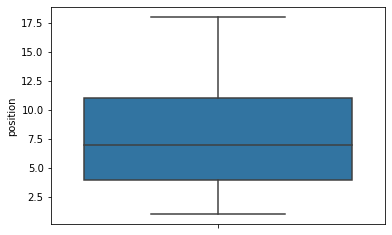

In [11]:
sns.boxplot(y=button['position'])

In [12]:
final_data = button[['raceId', 'position']]
final_data.head()

,raceId,position
0,1,1
1,2,1
2,3,3
3,4,1
4,5,1


In [13]:
final_data.to_csv('./data/button_results.csv', index=False)